# Merge data: GDP, nightlights, landcover, and NPP

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import json
import sys
import statsmodels.api as sm

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


## Load data

### GDP data

In [2]:
county_gdp = pd.read_csv("/work/PhD_2022_2025/data/county_rgdp.csv")
county_gdp = county_gdp.rename(
    columns={
        "Sgnyea": "year",
        "Prvcnm_id": "province_id",
        "CityName_id": "city_id",
        "Ctnm_id": "county_id"
    }
)
county_gdp = county_gdp.query("year >= 2001 and year <= 2020")
county_gdp

year      AreaID              Ctnm_en  county_id  province_id  \
1982   2001  20408037.0       Jiangpu County   320122.0     320000.0   
1983   2001  20405086.0       Liuhe District   320116.0     320000.0   
1984   2001  20405087.0      Lishui District   320117.0     320000.0   
1985   2001  20405088.0     Gaochun District   320118.0     320000.0   
1986   2001  20405097.0       Jiangyin(city)   320281.0     320000.0   
...     ...         ...                  ...        ...          ...   
47302  2020         NaN      Baochi District        NaN     120000.0   
47303  2020         NaN  Binhai New District        NaN     120000.0   
47304  2020         NaN        Ninghe County        NaN     120000.0   
47305  2020         NaN       Jinghai County        NaN     120000.0   
47306  2020         NaN               JiXian        NaN     120000.0   

        city_id CityName         Prvcnm_en.x  Cmect01  Cmect02  ...  Cmect14  \
1982   320100.0      南京市  Jiangsu (province)      NaN      NaN  ...      NaN   
1983   320100.0      南京市  Jiangsu (province)      NaN      NaN  ...      NaN   
1984   320100.0      南京市  Jiangsu (province)      NaN      NaN  ...      NaN   
1985   320100.0      南京市  Jiangsu (province)      NaN      NaN  ...      NaN   
1986   320200.0      无锡市  Jiangsu (province)      NaN      NaN  ...      NaN   
...         ...      ...                 ...      ...      ...  ...      ...   
47302       NaN      NaN             Tianjin      NaN      NaN  ...      NaN   
47303       NaN      NaN             Tianjin      NaN      NaN  ...      NaN   
47304       NaN      NaN             Tianjin      NaN      NaN  ...      NaN   
47305       NaN      NaN             Tianjin      NaN      NaN  ...      NaN   
47306       NaN      NaN             Tianjin      NaN      NaN  ...      NaN   

       Cmect15  Cmect16  Cmect17  Cmect18  Prvcnm_en.y      Pi0101  \
1982       NaN      NaN      NaN      NaN      Jiangsu  100.900800   
1983       NaN      NaN      NaN      NaN      Jiangsu  100.900800   
1984       NaN      NaN      NaN      NaN      Jiangsu  100.900800   
1985       NaN      NaN      NaN      NaN      Jiangsu  100.900800   
1986       NaN      NaN      NaN      NaN      Jiangsu  100.900800   
...        ...      ...      ...      ...          ...         ...   
47302      NaN      NaN      NaN      NaN      Tianjin  154.111561   
47303      NaN      NaN      NaN      NaN      Tianjin  154.111561   
47304      NaN      NaN      NaN      NaN      Tianjin  154.111561   
47305      NaN      NaN      NaN      NaN      Tianjin  154.111561   
47306      NaN      NaN      NaN      NaN      Tianjin  154.111561   

       rel_cpi_2010   county_rgdp  county_rgdppc  
1982      81.354509  3.951840e+05   13230.981377  
1983      81.354509  6.157004e+05    9027.157862  
1984      81.354509  5.303947e+05   13126.500383  
1985      81.354509  5.303947e+05   12407.425308  
1986      81.354509  4.486906e+06   38922.243153  
...             ...           ...            ...  
47302    127.979599  2.768977e+06            NaN  
47303    127.979599  4.587498e+07            NaN  
47304    127.979599  2.443967e+06            NaN  
47305    127.979599  3.383209e+06            NaN  
47306    127.979599  1.754955e+06            NaN  

[45325 rows x 31 columns]

In [3]:
city_gdp = pd.read_csv("/work/PhD_2022_2025/data/city_rgdp.csv")
city_gdp = city_gdp.rename(
    columns={
        "Sgnyea": "year",
        "Prvcnm_id": "province_id",
        "Ctnm_id": "city_id"
    }
)
city_gdp = city_gdp.query("year >= 2001 and year <= 2020")
city_gdp

year              Ctnm_en   city_id                     Cttyp_en  \
327   2001          Hefei(city)  340100.0  City (Sub-provincial level)   
328   2001        Huaibei(city)  340600.0  City (Sub-provincial level)   
329   2001         Bozhou(city)  341600.0  City (Sub-provincial level)   
330   2001               Suzhou  341300.0  City (Sub-provincial level)   
331   2001         Bengbu(city)  340300.0  City (Sub-provincial level)   
...    ...                  ...       ...                          ...   
6977  2020        Qitaihe(city)  230900.0  City (Sub-provincial level)   
6978  2020     Mudanjiang(city)  231000.0  City (Sub-provincial level)   
6979  2020          Heihe(city)  231100.0  City (Sub-provincial level)   
6980  2020         Suihua(city)  231200.0  City (Sub-provincial level)   
6981  2020  Daxinganling Region  232700.0  City (Sub-provincial level)   

      province_id              Prvcnm_en.x    Gdpct01  Gdpct02  Gdpct03  \
327      340000.0         Anhui (province)   363.4400  10.5000  49.3000   
328      340000.0         Anhui (province)   107.3800  16.3000  48.5000   
329      340000.0         Anhui (province)   164.0200  41.2000  24.2000   
330      340000.0         Anhui (province)   193.2200  46.3000  21.6000   
331      340000.0         Anhui (province)   171.6500  23.6000  39.7000   
...           ...                      ...        ...      ...      ...   
6977     230000.0  Heilongjiang (province)   206.4351  17.4467  38.3536   
6978     230000.0  Heilongjiang (province)   831.7356  23.7271  21.4088   
6979     230000.0  Heilongjiang (province)   614.3528  44.8768  12.7195   
6980     230000.0  Heilongjiang (province)  1150.1633  48.7139  11.3161   
6981     230000.0  Heilongjiang (province)   141.9103  39.4186  12.5604   

      Gdpct04  GDP_PerCapita   GDPYoY  GDP_PrimInd  GDP_SecInd  GDP_TerInd  \
327   40.2000      8257.0000  12.5000     380900.0   1791600.0   1461900.0   
328   35.2000      5436.0000   8.1000     175400.0    520800.0    377600.0   
329   34.6000      3109.0000   2.5000     675600.0    397700.0    566900.0   
330   32.1000      3330.0000   8.1000     894500.0    418200.0    619500.0   
331   36.7000      5067.0000   8.0000     405100.0    681800.0    629600.0   
...       ...            ...      ...          ...         ...         ...   
6977  44.1998     29680.8987  -2.4537     360161.0    791752.0    912438.0   
6978  54.8641     35873.1673   0.3798    1973466.0   1780650.0   4563240.0   
6979  42.4036     47085.6817   3.4752    2757020.0    781428.0   2605079.5   
6980  39.9700     30256.8808   1.9538    5602893.0   1301541.0   4597199.0   
6981  48.0210     42072.5528   2.6755     559390.0    178245.0    681468.0   

       Prvcnm_en.y      Pi0101  rel_cpi_2010   city_rgdp   city_rgdppc  
327          Anhui  101.203500     81.073141  448.286565  10184.630653  
328          Anhui  101.203500     81.073141  132.448303   6705.056586  
329          Anhui  101.203500     81.073141  202.311144   3834.808853  
330          Anhui  101.203500     81.073141  238.328005   4107.402213  
331          Anhui  101.203500     81.073141  211.722399   6249.912016  
...            ...         ...           ...         ...           ...  
6977  Heilongjiang  155.512726    126.283559  163.469498  23503.375193  
6978  Heilongjiang  155.512726    126.283559  658.625403  28406.838989  
6979  Heilongjiang  155.512726    126.283559  486.486764  37285.678389  
6980  Heilongjiang  155.512726    126.283559  910.778338  23959.477400  
6981  Heilongjiang  155.512726    126.283559  112.374327  33315.938436  

[6655 rows x 20 columns]

### VIIRS-like NTL

In [4]:
county_ntl = pd.read_csv("/work/PhD_2022_2025/data/raw_data/remote_sensing/NTL_VIIRS_like/sol_by_year_by_class_by_county.csv")
county_ntl

province  province_id     city  city_id county  county_id  year  \
0       内蒙古自治区       150000    锡林郭勒盟   152500    多伦县     152531  2001   
1       内蒙古自治区       150000      兴安盟   152200    突泉县     152224  2001   
2       内蒙古自治区       150000     阿拉善盟   152900  阿拉善右旗     152922  2001   
3       内蒙古自治区       150000     阿拉善盟   152900  阿拉善左旗     152921  2001   
4       内蒙古自治区       150000     阿拉善盟   152900   额济纳旗     152923  2001   
...        ...          ...      ...      ...    ...        ...   ...   
57535  香港特别行政区       810000  香港特别行政区   810000    湾仔区     810002  2020   
57536  香港特别行政区       810000  香港特别行政区   810000    西贡区     810015  2020   
57537  香港特别行政区       810000  香港特别行政区   810000   油尖旺区     810005  2020   
57538  香港特别行政区       810000  香港特别行政区   810000    元朗区     810012  2020   
57539  香港特别行政区       810000  香港特别行政区   810000    中西区     810001  2020   

         urban_sol  agriculture_sol     total_sol  
0       276.268933       138.464377    419.385415  
1       307.790284        32.534437    340.324721  
2        16.386511         0.000000     54.006109  
3       266.901539       296.776790    953.765278  
4       318.202330       147.921867    582.211361  
...            ...              ...           ...  
57535   372.911547       204.440006   1554.756150  
57536  1572.491359       210.204998   3662.051608  
57537  2663.580197         0.000000   2966.562961  
57538  8857.527886      1077.126799  12666.035292  
57539   334.162748         0.000000   1420.831194  

[57540 rows x 10 columns]

In [5]:
city_ntl = pd.read_csv("/work/PhD_2022_2025/data/raw_data/remote_sensing/NTL_VIIRS_like/sol_by_year_by_class_by_city.csv")
city_ntl

province  province_id     city  city_id  year      urban_sol  \
0         黑龙江省       230000   大兴安岭地区   232700  2001    1722.572016   
1          台湾省       710000      台湾省   710000  2001  244729.353051   
2          安徽省       340000      安庆市   340800  2001    1531.836327   
3          安徽省       340000      蚌埠市   340300  2001     971.260212   
4          安徽省       340000      亳州市   341600  2001    1245.402142   
...        ...          ...      ...      ...   ...            ...   
7415  新疆维吾尔自治区       650000    图木舒克市   659003  2020     410.849998   
7416  新疆维吾尔自治区       650000     五家渠市   659004  2020     752.068157   
7417  新疆维吾尔自治区       650000      新星市   659011  2020      45.045333   
7418   澳门特别行政区       820000  澳门特别行政区   820000  2020    3625.589212   
7419   香港特别行政区       810000  香港特别行政区   810000  2020   42356.423383   

      agriculture_sol      total_sol  
0          410.510898    2568.673074  
1        73468.688838  360433.687369  
2           17.466398    1605.739314  
3           45.440000    1025.059697  
4           23.540433    1274.135149  
...               ...            ...  
7415      4959.279528    5616.826487  
7416      3960.125103    5145.665962  
7417       672.240316    1235.263314  
7418       119.415003    4602.315313  
7419      4063.676357   72277.978560  

[7420 rows x 8 columns]

### MODIS landcover: area of class

In [6]:
county_land = pd.read_csv("/work/PhD_2022_2025/data/raw_data/remote_sensing/land_cover/class_area_by_county_by_year.csv")
county_land = county_land.fillna(0)
county_land

province  province_id     city  city_id county  county_id  year  \
0       内蒙古自治区       150000    锡林郭勒盟   152500    多伦县     152531  2001   
1       内蒙古自治区       150000      兴安盟   152200    突泉县     152224  2001   
2       内蒙古自治区       150000     阿拉善盟   152900  阿拉善右旗     152922  2001   
3       内蒙古自治区       150000     阿拉善盟   152900  阿拉善左旗     152921  2001   
4       内蒙古自治区       150000     阿拉善盟   152900   额济纳旗     152923  2001   
...        ...          ...      ...      ...    ...        ...   ...   
57535  香港特别行政区       810000  香港特别行政区   810000    湾仔区     810002  2020   
57536  香港特别行政区       810000  香港特别行政区   810000    西贡区     810015  2020   
57537  香港特别行政区       810000  香港特别行政区   810000   油尖旺区     810005  2020   
57538  香港特别行政区       810000  香港特别行政区   810000    元朗区     810012  2020   
57539  香港特别行政区       810000  香港特别行政区   810000    中西区     810001  2020   

              1          2    3  ...          8          9           10  \
0      0.000000   0.000000  0.0  ...   0.000000   0.000000  3867.191672   
1      0.000000   0.000000  0.0  ...   0.000000   0.000000  4733.613539   
2      0.000000   0.000000  0.0  ...   0.000000   0.000000   935.101436   
3      4.856993   0.000000  0.0  ...   0.000000  36.311981  4890.842461   
4      0.000000   0.000000  0.0  ...   0.000000   0.000000   637.423056   
...         ...        ...  ...  ...        ...        ...          ...   
57535  0.000000   2.503959  0.0  ...   1.541341   1.832968     0.829768   
57536  3.529406  54.321854  0.0  ...  17.526389   8.717703     3.827837   
57537  0.000000   0.000000  0.0  ...   0.000000   0.000000     0.230178   
57538  0.000000  20.220930  0.0  ...   3.264068  38.432680    14.842414   
57539  0.000000   3.008535  0.0  ...   3.401218   1.841803     0.320518   

              11         12         13        14   15            16         17  
0       0.000000   4.148367   4.812157  0.000000  0.0      5.743598   0.000000  
1       0.175061   5.423350  50.973058  0.000000  0.0      3.948507   6.484387  
2       0.000000   0.000000   4.251747  0.000000  0.0  70571.260909   0.000000  
3      83.288071  47.443917  21.647589  0.000000  0.0  74513.519373   0.000000  
4       0.000000   0.000000  29.913554  0.000000  0.0  87431.971611   0.943487  
...          ...        ...        ...       ...  ...           ...        ...  
57535   0.000000   0.000000   3.322763  0.000000  0.0      0.757489   0.632877  
57536  23.116727   0.230229  16.168763  0.000000  0.0      0.000000  26.028755  
57537   0.000000   0.000000   5.567607  0.000000  0.0      2.273897   4.518223  
57538  13.787846   2.717190  49.093376  2.314522  0.0      0.000000   6.664164  
57539   0.539922   0.000000   3.244292  0.000000  0.0      1.802916   2.566674  

[57540 rows x 24 columns]

In [7]:
city_land = pd.read_csv("/work/PhD_2022_2025/data/raw_data/remote_sensing/land_cover/class_area_by_city_by_year.csv")
city_land = city_land.fillna(0)
city_land 

province  province_id     city  city_id  year            1  \
0         黑龙江省       230000   大兴安岭地区   232700  2001     0.004668   
1          台湾省       710000      台湾省   710000  2001  1237.392795   
2          安徽省       340000      安庆市   340800  2001    21.654009   
3          安徽省       340000      蚌埠市   340300  2001     0.000000   
4          安徽省       340000      亳州市   341600  2001     0.000000   
...        ...          ...      ...      ...   ...          ...   
7415  新疆维吾尔自治区       650000    图木舒克市   659003  2020     0.000000   
7416  新疆维吾尔自治区       650000     五家渠市   659004  2020     0.000000   
7417  新疆维吾尔自治区       650000      新星市   659011  2020     0.000000   
7418   澳门特别行政区       820000  澳门特别行政区   820000  2020     0.000000   
7419   香港特别行政区       810000  香港特别行政区   810000  2020    14.399555   

                 2            3            4            5  ...             8  \
0         0.000000  2587.373455  5386.940050  7475.837035  ...  45054.263893   
1     19215.986863     0.437561    20.429541   278.616039  ...   1778.662029   
2         0.000000     0.000000   302.712838   731.852724  ...   3969.973953   
3         0.000000     0.000000     0.000000     0.000000  ...      0.000000   
4         0.000000     0.000000     0.000000     0.000000  ...      0.000000   
...            ...          ...          ...          ...  ...           ...   
7415      0.000000     0.000000     0.000000     0.000000  ...      0.000000   
7416      0.000000     0.000000     0.000000     0.000000  ...      0.000000   
7417      0.000000     0.000000     0.000000     0.000000  ...      0.000000   
7418      0.000000     0.000000     0.000000     0.000000  ...      0.000000   
7419    389.888007     0.000000     0.230258     7.723119  ...    127.210642   

                9           10          11           12           13  \
0     3607.842692  1146.545410   18.976473   554.763405   215.819802   
1     4287.996430   538.245053  358.572432  3412.940913  2990.034746   
2     2356.779963    36.889047  184.413435  2712.082266   183.421082   
3      168.691038    85.070672   47.889532  5205.623491   286.281569   
4       57.111660     0.000000    0.000000  8230.748120   216.064757   
...           ...          ...         ...          ...          ...   
7415     0.000000   902.492137    0.766852   437.713525    23.372424   
7416     0.896535   533.424954    1.742594   170.864994    13.821016   
7417     0.000000   693.962563    0.000000    71.685659     5.751381   
7418     6.177281     1.830088    2.563351     0.000000    12.208917   
7419   139.801491    53.083757  111.368445     7.746524   237.337119   

               14         15           16           17  
0       10.483317   0.000000     0.000000     0.471849  
1     1762.894887   1.764360   254.857677  2188.045820  
2     1964.213123   0.000000     4.247096  1020.225009  
3        1.529988   0.000000     0.418387   172.591680  
4       22.066005   0.000000     0.000000     0.115678  
...           ...        ...          ...          ...  
7415     0.000000   0.000000   452.697078    93.508245  
7416     0.000000   0.000000    16.156511     6.812034  
7417     0.000000  20.094297  1714.536119     0.000000  
7418     0.000000   0.000000     2.429954    27.513582  
7419     8.219796   0.000000    12.087450   178.626130  

[7420 rows x 22 columns]

### NPP (net primary productivity)

In [8]:
county_npp = pd.read_csv("/work/PhD_2022_2025/data/raw_data/remote_sensing/NPP/anpp_by_year_by_class_by_county.csv")
county_npp

province  province_id     city  city_id  year county  county_id  \
0       内蒙古自治区       150000    锡林郭勒盟   152500  2001    多伦县     152531   
1       内蒙古自治区       150000      兴安盟   152200  2001    突泉县     152224   
2       内蒙古自治区       150000     阿拉善盟   152900  2001  阿拉善右旗     152922   
3       内蒙古自治区       150000     阿拉善盟   152900  2001  阿拉善左旗     152921   
4       内蒙古自治区       150000     阿拉善盟   152900  2001   额济纳旗     152923   
...        ...          ...      ...      ...   ...    ...        ...   
57535  香港特别行政区       810000  香港特别行政区   810000  2020    湾仔区     810002   
57536  香港特别行政区       810000  香港特别行政区   810000  2020    西贡区     810015   
57537  香港特别行政区       810000  香港特别行政区   810000  2020   油尖旺区     810005   
57538  香港特别行政区       810000  香港特别行政区   810000  2020    元朗区     810012   
57539  香港特别行政区       810000  香港特别行政区   810000  2020    中西区     810001   

       urban_anpp  agriculture_anpp  overall_anpp  
0        0.000000        243.164088    243.167809  
1      139.100000        170.622539    170.614607  
2        0.000000         77.026909     73.867637  
3        0.000000         90.834244     79.887617  
4        0.000000         47.479602     47.936949  
...           ...               ...           ...  
57535    0.000000        516.750000    932.585524  
57536  465.720000        629.323100    983.464028  
57537  197.327073        156.940446    181.214620  
57538  515.980090        778.431159    818.715543  
57539    0.000000        178.000000    803.018241  

[57540 rows x 10 columns]

In [9]:
city_npp = pd.read_csv("/work/PhD_2022_2025/data/raw_data/remote_sensing/NPP/anpp_by_year_by_class_by_city.csv")
city_npp

province  province_id     city  city_id  year  urban_anpp  \
0         黑龙江省       230000   大兴安岭地区   232700  2001  196.739092   
1          台湾省       710000      台湾省   710000  2001  534.336328   
2          安徽省       340000      安庆市   340800  2001  418.442287   
3          安徽省       340000      蚌埠市   340300  2001  304.182954   
4          安徽省       340000      亳州市   341600  2001  267.492857   
...        ...          ...      ...      ...   ...         ...   
7415  新疆维吾尔自治区       650000    图木舒克市   659003  2020    0.000000   
7416  新疆维吾尔自治区       650000     五家渠市   659004  2020    0.000000   
7417  新疆维吾尔自治区       650000      新星市   659011  2020    0.000000   
7418   澳门特别行政区       820000  澳门特别行政区   820000  2020  345.072292   
7419   香港特别行政区       810000  香港特别行政区   810000  2020  445.638181   

      agriculture_anpp  overall_anpp  
0           350.792143    445.582477  
1           779.874391   1157.081436  
2           518.011525    524.297812  
3           361.283175    358.764103  
4           338.905689    338.414874  
...                ...           ...  
7415         62.408506     61.308951  
7416        114.660579    113.863737  
7417        163.903328    155.692760  
7418        660.356735    584.859624  
7419        753.094053    964.904153  

[7420 rows x 8 columns]

### Population

In [10]:
city_pop = pd.read_csv(
    "/work/PhD_2022_2025/data/raw_data/remote_sensing/population/population_by_year_by_class_by_city.csv"
)
city_pop


province  province_id     city  city_id  year  agriculture_population  \
0         黑龙江省       230000   大兴安岭地区   232700  2001            5.072447e+04   
1          台湾省       710000      台湾省   710000  2001            3.995813e+06   
2          安徽省       340000      安庆市   340800  2001            2.909328e+06   
3          安徽省       340000      蚌埠市   340300  2001            2.371705e+06   
4          安徽省       340000      亳州市   341600  2001            4.586640e+06   
...        ...          ...      ...      ...   ...                     ...   
7415  新疆维吾尔自治区       650000    图木舒克市   659003  2020            1.014564e+05   
7416  新疆维吾尔自治区       650000     五家渠市   659004  2020            7.413482e+04   
7417  新疆维吾尔自治区       650000      新星市   659011  2020            1.129558e+04   
7418   澳门特别行政区       820000  澳门特别行政区   820000  2020            0.000000e+00   
7419   香港特别行政区       810000  香港特别行政区   810000  2020            1.587805e+05   

      urban_population  total_population  
0         1.464841e+05      5.324005e+05  
1         1.434193e+07      2.230316e+07  
2         5.496513e+05      5.236882e+06  
3         8.565965e+05      3.373788e+06  
4         5.117309e+05      5.140829e+06  
...                ...               ...  
7415      3.967900e+04      1.418041e+05  
7416      2.167895e+04      9.983193e+04  
7417      4.596604e+03      1.704556e+04  
7418      4.130053e+05      5.765733e+05  
7419      5.723531e+06      7.257298e+06  

[7420 rows x 8 columns]

In [11]:
county_pop = pd.read_csv(
    "/work/PhD_2022_2025/data/raw_data/remote_sensing/population/population_by_year_by_class_by_county.csv"
)
county_pop

province  province_id     city  city_id  year county  county_id  \
0       内蒙古自治区       150000    锡林郭勒盟   152500  2001    多伦县     152531   
1       内蒙古自治区       150000      兴安盟   152200  2001    突泉县     152224   
2       内蒙古自治区       150000     阿拉善盟   152900  2001  阿拉善右旗     152922   
3       内蒙古自治区       150000     阿拉善盟   152900  2001  阿拉善左旗     152921   
4       内蒙古自治区       150000     阿拉善盟   152900  2001   额济纳旗     152923   
...        ...          ...      ...      ...   ...    ...        ...   
57535  香港特别行政区       810000  香港特别行政区   810000  2020    湾仔区     810002   
57536  香港特别行政区       810000  香港特别行政区   810000  2020    西贡区     810015   
57537  香港特别行政区       810000  香港特别行政区   810000  2020   油尖旺区     810005   
57538  香港特别行政区       810000  香港特别行政区   810000  2020    元朗区     810012   
57539  香港特别行政区       810000  香港特别行政区   810000  2020    中西区     810001   

       agriculture_population  urban_population  total_population  
0               110874.925490        752.000000     111729.925490  
1               283267.866667      43276.823529     326602.533333  
2                  343.792157          7.000000      21379.368627  
3                28093.976471      16456.164706     152095.337255  
4                  995.000000        986.000000      18063.380392  
...                       ...               ...               ...  
57535                0.000000     167828.360784     314142.937255  
57536             7123.380392     112913.121569     198274.368627  
57537                0.000000     430535.890196     463232.058824  
57538            38622.156863     702043.407843     877519.031373  
57539                0.000000      47432.309804     236076.627451  

[57540 rows x 10 columns]

### Administrative boundaries

In [12]:
# Shapefile: adm3
gdf_county = gpd.read_file("/work/PhD_2022_2025/data/raw_data/map/县.shp", encoding='utf-8')
gdf_county = gdf_county.rename(
    columns={
        "省代码": "province_id",
        "市代码": "city_id",
        "县代码": "county_id",
    }
)
gdf_county

省  province_id    市  city_id    县  county_id  \
0     安徽省       340000  安庆市   340800  大观区     340803   
1     安徽省       340000  安庆市   340800  怀宁县     340822   
2     安徽省       340000  安庆市   340800  潜山市     340882   
3     安徽省       340000  安庆市   340800  宿松县     340826   
4     安徽省       340000  安庆市   340800  太湖县     340825   
...   ...          ...  ...      ...  ...        ...   
2872  浙江省       330000  杭州市   330100  桐庐县     330122   
2873  浙江省       330000  杭州市   330100  西湖区     330106   
2874  浙江省       330000  杭州市   330100  萧山区     330109   
2875  浙江省       330000  杭州市   330100  余杭区     330110   
2876  浙江省       330000  杭州市   330100  临平区     330113   

                                                     说明    年度  县类型  市类型 省类型  \
0                                                  None     0  市辖区  地级市   省   
1                                                  None     0    县  地级市   省   
2     撤销潜山县，设立县级潜山市，以原潜山县的行政区域为潜山市行政区域，潜山市人民政府驻梅城镇潜阳...  2018  县级市  地级市   省   
3                                                  None     0    县  地级市   省   
4                                                  None     0    县  地级市   省   
...                                                 ...   ...  ...  ...  ..   
2872                                               None     0    县  地级市   省   
2873                                               None     0  市辖区  地级市   省   
2874                                               None     0  市辖区  地级市   省   
2875  撤销杭州市余杭区，设立新的杭州市余杭区，以原余杭区的余杭街道、仓前街道、闲林街道、五常街道、...  2021  市辖区  地级市   省   
2876  设立杭州市临平区，以原余杭区的临平街道、东湖街道、南苑街道、星桥街道、运河街道、乔司街道、崇...  2021  市辖区  地级市   省   

                                               geometry  
0     POLYGON ((117.05275 30.53093, 117.05199 30.525...  
1     POLYGON ((116.98927 30.73981, 116.98422 30.735...  
2     POLYGON ((116.70456 31.04546, 116.70640 31.039...  
3     POLYGON ((116.46186 30.12618, 116.47118 30.122...  
4     POLYGON ((115.84645 30.75920, 115.84812 30.756...  
...                                                 ...  
2872  POLYGON ((119.88599 29.76591, 119.88570 29.761...  
2873  POLYGON ((120.08097 30.33345, 120.08366 30.332...  
2874  POLYGON ((120.64005 30.22064, 120.63780 30.217...  
2875  POLYGON ((119.76714 30.54884, 119.76583 30.546...  
2876  POLYGON ((120.33691 30.47375, 120.33607 30.468...  

[2877 rows x 12 columns]

In [13]:
#Shapefile: adm2
gdf_city = gpd.read_file("/work/PhD_2022_2025/data/raw_data/map/市.shp", encoding='utf-8')
gdf_city = gdf_city.rename(
    columns={
        "省代码": "province_id",
        "市代码": "city_id"
    }
)
gdf_city

省  province_id    市  city_id  市类型  省类型  \
0    安徽省       340000  安庆市   340800  地级市    省   
1    安徽省       340000  蚌埠市   340300  地级市    省   
2    安徽省       340000  亳州市   341600  地级市    省   
3    安徽省       340000  池州市   341700  地级市    省   
4    安徽省       340000  滁州市   341100  地级市    省   
..   ...          ...  ...      ...  ...  ...   
366  浙江省       330000  绍兴市   330600  地级市    省   
367  浙江省       330000  台州市   331000  地级市    省   
368  浙江省       330000  温州市   330300  地级市    省   
369  浙江省       330000  舟山市   330900  地级市    省   
370  重庆市       500000  重庆市   500000  直辖市  直辖市   

                                              geometry  
0    POLYGON ((117.15075 31.07444, 117.14907 31.070...  
1    POLYGON ((117.97350 33.33581, 117.98183 33.335...  
2    POLYGON ((116.38814 33.78433, 116.38908 33.783...  
3    POLYGON ((118.09546 30.64345, 118.08867 30.636...  
4    POLYGON ((119.17951 32.82747, 119.18347 32.812...  
..                                                 ...  
366  POLYGON ((120.86294 30.27435, 120.86727 30.266...  
367  MULTIPOLYGON (((121.15911 28.02510, 121.16133 ...  
368  MULTIPOLYGON (((120.83169 27.04793, 120.83169 ...  
369  MULTIPOLYGON (((122.16567 29.60948, 122.16513 ...  
370  MULTIPOLYGON (((105.55547 30.18840, 105.55351 ...  

[371 rows x 7 columns]

## Merge data

### Non-spatial panel

In [14]:
#Merge county-level satellite datset 
county_remote = (
    county_ntl.merge(county_land, on=["county_id", "year"], suffixes=('_ntl', '_land'))
    .merge(county_npp, on=["county_id", "year"], suffixes=('_land', '_npp'))
    .merge(county_pop, on=["county_id", "year"], suffixes=('_npp', '_pop'))
)
county_remote


province_ntl  province_id_ntl city_ntl  city_id_ntl county_ntl  \
0           内蒙古自治区           150000    锡林郭勒盟       152500        多伦县   
1           内蒙古自治区           150000      兴安盟       152200        突泉县   
2           内蒙古自治区           150000     阿拉善盟       152900      阿拉善右旗   
3           内蒙古自治区           150000     阿拉善盟       152900      阿拉善左旗   
4           内蒙古自治区           150000     阿拉善盟       152900       额济纳旗   
...            ...              ...      ...          ...        ...   
57535      香港特别行政区           810000  香港特别行政区       810000        湾仔区   
57536      香港特别行政区           810000  香港特别行政区       810000        西贡区   
57537      香港特别行政区           810000  香港特别行政区       810000       油尖旺区   
57538      香港特别行政区           810000  香港特别行政区       810000        元朗区   
57539      香港特别行政区           810000  香港特别行政区       810000        中西区   

       county_id  year    urban_sol  agriculture_sol     total_sol  ...  \
0         152531  2001   276.268933       138.464377    419.385415  ...   
1         152224  2001   307.790284        32.534437    340.324721  ...   
2         152922  2001    16.386511         0.000000     54.006109  ...   
3         152921  2001   266.901539       296.776790    953.765278  ...   
4         152923  2001   318.202330       147.921867    582.211361  ...   
...          ...   ...          ...              ...           ...  ...   
57535     810002  2020   372.911547       204.440006   1554.756150  ...   
57536     810015  2020  1572.491359       210.204998   3662.051608  ...   
57537     810005  2020  2663.580197         0.000000   2966.562961  ...   
57538     810012  2020  8857.527886      1077.126799  12666.035292  ...   
57539     810001  2020   334.162748         0.000000   1420.831194  ...   

      agriculture_anpp  overall_anpp province_pop  province_id_pop city_pop  \
0           243.164088    243.167809       内蒙古自治区           150000    锡林郭勒盟   
1           170.622539    170.614607       内蒙古自治区           150000      兴安盟   
2            77.026909     73.867637       内蒙古自治区           150000     阿拉善盟   
3            90.834244     79.887617       内蒙古自治区           150000     阿拉善盟   
4            47.479602     47.936949       内蒙古自治区           150000     阿拉善盟   
...                ...           ...          ...              ...      ...   
57535       516.750000    932.585524      香港特别行政区           810000  香港特别行政区   
57536       629.323100    983.464028      香港特别行政区           810000  香港特别行政区   
57537       156.940446    181.214620      香港特别行政区           810000  香港特别行政区   
57538       778.431159    818.715543      香港特别行政区           810000  香港特别行政区   
57539       178.000000    803.018241      香港特别行政区           810000  香港特别行政区   

       city_id_pop  county_pop  agriculture_population  urban_population  \
0           152500         多伦县           110874.925490        752.000000   
1           152200         突泉县           283267.866667      43276.823529   
2           152900       阿拉善右旗              343.792157          7.000000   
3           152900       阿拉善左旗            28093.976471      16456.164706   
4           152900        额济纳旗              995.000000        986.000000   
...            ...         ...                     ...               ...   
57535       810000         湾仔区                0.000000     167828.360784   
57536       810000         西贡区             7123.380392     112913.121569   
57537       810000        油尖旺区                0.000000     430535.890196   
57538       810000         元朗区            38622.156863     702043.407843   
57539       810000         中西区                0.000000      47432.309804   

       total_population  
0         111729.925490  
1         326602.533333  
2          21379.368627  
3         152095.337255  
4          18063.380392  
...                 ...  
57535     314142.937255  
57536     198274.368627  
57537     463232.058824  
57538     877519.031373  
57539     236076.627451  

[57540 rows x 48 columns]

In [15]:
#Merge city-level satellite datset 
city_remote = (
    city_ntl.merge(city_land, on=["city_id", "year"], suffixes=('_ntl', '_land'))
    .merge(city_npp, on=["city_id", "year"], suffixes=('_land', '_npp'))
    .merge(city_pop, on=["city_id", "year"], suffixes=('_npp', '_pop'))
)
city_remote

province_ntl  province_id_ntl city_ntl  city_id  year      urban_sol  \
0            黑龙江省           230000   大兴安岭地区   232700  2001    1722.572016   
1             台湾省           710000      台湾省   710000  2001  244729.353051   
2             安徽省           340000      安庆市   340800  2001    1531.836327   
3             安徽省           340000      蚌埠市   340300  2001     971.260212   
4             安徽省           340000      亳州市   341600  2001    1245.402142   
...           ...              ...      ...      ...   ...            ...   
7415     新疆维吾尔自治区           650000    图木舒克市   659003  2020     410.849998   
7416     新疆维吾尔自治区           650000     五家渠市   659004  2020     752.068157   
7417     新疆维吾尔自治区           650000      新星市   659011  2020      45.045333   
7418      澳门特别行政区           820000  澳门特别行政区   820000  2020    3625.589212   
7419      香港特别行政区           810000  香港特别行政区   810000  2020   42356.423383   

      agriculture_sol      total_sol province_land  province_id_land  ...  \
0          410.510898    2568.673074          黑龙江省            230000  ...   
1        73468.688838  360433.687369           台湾省            710000  ...   
2           17.466398    1605.739314           安徽省            340000  ...   
3           45.440000    1025.059697           安徽省            340000  ...   
4           23.540433    1274.135149           安徽省            340000  ...   
...               ...            ...           ...               ...  ...   
7415      4959.279528    5616.826487      新疆维吾尔自治区            650000  ...   
7416      3960.125103    5145.665962      新疆维吾尔自治区            650000  ...   
7417       672.240316    1235.263314      新疆维吾尔自治区            650000  ...   
7418       119.415003    4602.315313       澳门特别行政区            820000  ...   
7419      4063.676357   72277.978560       香港特别行政区            810000  ...   

     city_npp  urban_anpp  agriculture_anpp  overall_anpp  province_pop  \
0      大兴安岭地区  196.739092        350.792143    445.582477          黑龙江省   
1         台湾省  534.336328        779.874391   1157.081436           台湾省   
2         安庆市  418.442287        518.011525    524.297812           安徽省   
3         蚌埠市  304.182954        361.283175    358.764103           安徽省   
4         亳州市  267.492857        338.905689    338.414874           安徽省   
...       ...         ...               ...           ...           ...   
7415    图木舒克市    0.000000         62.408506     61.308951      新疆维吾尔自治区   
7416     五家渠市    0.000000        114.660579    113.863737      新疆维吾尔自治区   
7417      新星市    0.000000        163.903328    155.692760      新疆维吾尔自治区   
7418  澳门特别行政区  345.072292        660.356735    584.859624       澳门特别行政区   
7419  香港特别行政区  445.638181        753.094053    964.904153       香港特别行政区   

      province_id_pop  city_pop  agriculture_population  urban_population  \
0              230000    大兴安岭地区            5.072447e+04      1.464841e+05   
1              710000       台湾省            3.995813e+06      1.434193e+07   
2              340000       安庆市            2.909328e+06      5.496513e+05   
3              340000       蚌埠市            2.371705e+06      8.565965e+05   
4              340000       亳州市            4.586640e+06      5.117309e+05   
...               ...       ...                     ...               ...   
7415           650000     图木舒克市            1.014564e+05      3.967900e+04   
7416           650000      五家渠市            7.413482e+04      2.167895e+04   
7417           650000       新星市            1.129558e+04      4.596604e+03   
7418           820000   澳门特别行政区            0.000000e+00      4.130053e+05   
7419           810000   香港特别行政区            1.587805e+05      5.723531e+06   

      total_population  
0         5.324005e+05  
1         2.230316e+07  
2         5.236882e+06  
3         3.373788e+06  
4         5.140829e+06  
...                ...  
7415      1.418041e+05  
7416      9.983193e+04  
7417      1.704556e+04  
7418      5.765733e+05  
7419      7.257298e+06  

[7420 rows x 40 columns]

In [16]:
#merge satellite data with gdp (city)
city_longpanel = city_remote.merge(city_gdp, on=["city_id", "year"], how="left")
city_longpanel

province_ntl  province_id_ntl city_ntl  city_id  year      urban_sol  \
0            黑龙江省           230000   大兴安岭地区   232700  2001    1722.572016   
1             台湾省           710000      台湾省   710000  2001  244729.353051   
2             安徽省           340000      安庆市   340800  2001    1531.836327   
3             安徽省           340000      蚌埠市   340300  2001     971.260212   
4             安徽省           340000      亳州市   341600  2001    1245.402142   
...           ...              ...      ...      ...   ...            ...   
7415     新疆维吾尔自治区           650000    图木舒克市   659003  2020     410.849998   
7416     新疆维吾尔自治区           650000     五家渠市   659004  2020     752.068157   
7417     新疆维吾尔自治区           650000      新星市   659011  2020      45.045333   
7418      澳门特别行政区           820000  澳门特别行政区   820000  2020    3625.589212   
7419      香港特别行政区           810000  香港特别行政区   810000  2020   42356.423383   

      agriculture_sol      total_sol province_land  province_id_land  ...  \
0          410.510898    2568.673074          黑龙江省            230000  ...   
1        73468.688838  360433.687369           台湾省            710000  ...   
2           17.466398    1605.739314           安徽省            340000  ...   
3           45.440000    1025.059697           安徽省            340000  ...   
4           23.540433    1274.135149           安徽省            340000  ...   
...               ...            ...           ...               ...  ...   
7415      4959.279528    5616.826487      新疆维吾尔自治区            650000  ...   
7416      3960.125103    5145.665962      新疆维吾尔自治区            650000  ...   
7417       672.240316    1235.263314      新疆维吾尔自治区            650000  ...   
7418       119.415003    4602.315313       澳门特别行政区            820000  ...   
7419      4063.676357   72277.978560       香港特别行政区            810000  ...   

     GDP_PerCapita  GDPYoY  GDP_PrimInd  GDP_SecInd  GDP_TerInd   Prvcnm_en.y  \
0           8521.0     NaN      61000.0    207000.0    186000.0  Heilongjiang   
1              NaN     NaN          NaN         NaN         NaN           NaN   
2           4387.0     5.3     620700.0   1153200.0    867500.0         Anhui   
3           5067.0     8.0     405100.0    681800.0    629600.0         Anhui   
4           3109.0     2.5     675600.0    397700.0    566900.0         Anhui   
...            ...     ...          ...         ...         ...           ...   
7415           NaN     NaN          NaN         NaN         NaN           NaN   
7416           NaN     NaN          NaN         NaN         NaN           NaN   
7417           NaN     NaN          NaN         NaN         NaN           NaN   
7418           NaN     NaN          NaN         NaN         NaN           NaN   
7419           NaN     NaN          NaN         NaN         NaN           NaN   

        Pi0101  rel_cpi_2010   city_rgdp   city_rgdppc  
0      99.0864     80.462761   56.423617  10589.992095  
1          NaN           NaN         NaN           NaN  
2     101.2035     81.073141  325.804571   5411.163216  
3     101.2035     81.073141  211.722399   6249.912016  
4     101.2035     81.073141  202.311144   3834.808853  
...        ...           ...         ...           ...  
7415       NaN           NaN         NaN           NaN  
7416       NaN           NaN         NaN           NaN  
7417       NaN           NaN         NaN           NaN  
7418       NaN           NaN         NaN           NaN  
7419       NaN           NaN         NaN           NaN  

[7420 rows x 58 columns]

In [17]:
#merge satellite data with gdp (county)
county_longpanel = county_remote.merge(county_gdp, on=["county_id", "year"], how="left")
county_longpanel

province_ntl  province_id_ntl city_ntl  city_id_ntl county_ntl  \
0           内蒙古自治区           150000    锡林郭勒盟       152500        多伦县   
1           内蒙古自治区           150000      兴安盟       152200        突泉县   
2           内蒙古自治区           150000     阿拉善盟       152900      阿拉善右旗   
3           内蒙古自治区           150000     阿拉善盟       152900      阿拉善左旗   
4           内蒙古自治区           150000     阿拉善盟       152900       额济纳旗   
...            ...              ...      ...          ...        ...   
57535      香港特别行政区           810000  香港特别行政区       810000        湾仔区   
57536      香港特别行政区           810000  香港特别行政区       810000        西贡区   
57537      香港特别行政区           810000  香港特别行政区       810000       油尖旺区   
57538      香港特别行政区           810000  香港特别行政区       810000        元朗区   
57539      香港特别行政区           810000  香港特别行政区       810000        中西区   

       county_id  year    urban_sol  agriculture_sol     total_sol  ...  \
0         152531  2001   276.268933       138.464377    419.385415  ...   
1         152224  2001   307.790284        32.534437    340.324721  ...   
2         152922  2001    16.386511         0.000000     54.006109  ...   
3         152921  2001   266.901539       296.776790    953.765278  ...   
4         152923  2001   318.202330       147.921867    582.211361  ...   
...          ...   ...          ...              ...           ...  ...   
57535     810002  2020   372.911547       204.440006   1554.756150  ...   
57536     810015  2020  1572.491359       210.204998   3662.051608  ...   
57537     810005  2020  2663.580197         0.000000   2966.562961  ...   
57538     810012  2020  8857.527886      1077.126799  12666.035292  ...   
57539     810001  2020   334.162748         0.000000   1420.831194  ...   

      Cmect14  Cmect15 Cmect16  Cmect17 Cmect18     Prvcnm_en.y    Pi0101  \
0         NaN      NaN     NaN      NaN     NaN  Inner Mongolia  101.9078   
1         NaN      NaN     NaN      NaN     NaN  Inner Mongolia  101.9078   
2         NaN      NaN     NaN      NaN     NaN  Inner Mongolia  101.9078   
3         NaN      NaN     NaN      NaN     NaN  Inner Mongolia  101.9078   
4         NaN      NaN     NaN      NaN     NaN  Inner Mongolia  101.9078   
...       ...      ...     ...      ...     ...             ...       ...   
57535     NaN      NaN     NaN      NaN     NaN             NaN       NaN   
57536     NaN      NaN     NaN      NaN     NaN             NaN       NaN   
57537     NaN      NaN     NaN      NaN     NaN             NaN       NaN   
57538     NaN      NaN     NaN      NaN     NaN             NaN       NaN   
57539     NaN      NaN     NaN      NaN     NaN             NaN       NaN   

       rel_cpi_2010    county_rgdp  county_rgdppc  
0         80.196627   56255.483500    5520.182322  
1         80.196627  111370.021253    3690.928320  
2         80.196627   26946.270607   13001.793782  
3         80.196627  116420.108988   14632.785080  
4         80.196627   20948.512087   12783.580114  
...             ...            ...            ...  
57535           NaN            NaN            NaN  
57536           NaN            NaN            NaN  
57537           NaN            NaN            NaN  
57538           NaN            NaN            NaN  
57539           NaN            NaN            NaN  

[57540 rows x 77 columns]

In [18]:
#Save datasets
#city_longpanel.to_csv('/work/PhD_2022_2025/data/city_longpanel.csv')
#county_longpanel.to_csv('/work/PhD_2022_2025/data/county_longpanel.csv')

### Long to wide

In [19]:
city_wide = city_longpanel.pivot(
    index="city_id",
    columns="year",
    values=[
        "city_rgdp",
        "city_rgdppc"
    ],
)
city_wide.columns = [f"{var}_{year}" for var, year in city_wide.columns]
city_wide.reset_index(inplace=True)
city_wide

city_id  city_rgdp_2001  city_rgdp_2002  city_rgdp_2003  city_rgdp_2004  \
0     110000     4259.773750     5083.990941     5903.414142     6941.635172   
1     120000     2292.714441     2579.807117     3060.879450     3647.462890   
2     130100     1348.555050     1489.405185     1692.462386     1924.506987   
3     130200     1250.441499     1383.335531     1590.983917     1916.106576   
4     130300      381.806706      421.241601      475.371727      534.233130   
..       ...             ...             ...             ...             ...   
366   659010             NaN             NaN             NaN             NaN   
367   659011             NaN             NaN             NaN             NaN   
368   710000             NaN             NaN             NaN             NaN   
369   810000             NaN             NaN             NaN             NaN   
370   820000             NaN             NaN             NaN             NaN   

     city_rgdp_2005  city_rgdp_2006  city_rgdp_2007  city_rgdp_2008  \
0       7824.333589     9097.604486    11043.187435    11910.132527   
1       4514.073150     5089.993637     5747.707574     6978.414225   
2       2067.953134     2306.499922     2566.616531     2905.771152   
3       2346.715596     2688.342581     3021.834575     3645.755546   
4        568.438857      628.286013      743.200264      828.159674   
..              ...             ...             ...             ...   
366             NaN             NaN             NaN             NaN   
367             NaN             NaN             NaN             NaN   
368             NaN             NaN             NaN             NaN   
369             NaN             NaN             NaN             NaN   
370             NaN             NaN             NaN             NaN   

     city_rgdp_2009  ...  city_rgdppc_2011  city_rgdppc_2012  \
0      13210.534501  ...      81757.243513      85331.809659   
1       7888.615627  ...      82380.559935      87800.244324   
2       3093.539347  ...               NaN               NaN   
3       3929.923013  ...               NaN               NaN   
4        829.271560  ...               NaN               NaN   
..              ...  ...               ...               ...   
366             NaN  ...               NaN               NaN   
367             NaN  ...               NaN               NaN   
368             NaN  ...               NaN               NaN   
369             NaN  ...               NaN               NaN   
370             NaN  ...               NaN               NaN   

     city_rgdppc_2013  city_rgdppc_2014  city_rgdppc_2015  city_rgdppc_2016  \
0        89656.927728      93860.654506      98325.250736     105301.997703   
1        91504.943282      94445.106287      95349.142106      97754.009291   
2                 NaN               NaN               NaN               NaN   
3                 NaN               NaN               NaN               NaN   
4                 NaN               NaN               NaN               NaN   
..                ...               ...               ...               ...   
366               NaN               NaN               NaN               NaN   
367               NaN               NaN               NaN               NaN   
368               NaN               NaN               NaN               NaN   
369               NaN               NaN               NaN               NaN   
370               NaN               NaN               NaN               NaN   

     city_rgdppc_2017  city_rgdppc_2018  city_rgdppc_2019  city_rgdppc_2020  
0       114183.075194     123960.065372     129988.189134     128336.023073  
1        99234.045524      98781.312687               NaN      79398.592335  
2                 NaN               NaN      42343.663340      41552.764246  
3                 NaN               NaN      69426.176633      73335.791885  
4                 NaN               NaN      41122.034353      42228.297752  
..   

In [20]:
county_wide = county_longpanel.pivot(
    index="county_id",
    columns="year",
    values=[
        "county_rgdp",
        "county_rgdppc"
    ],
)
county_wide.columns = [f"{var}_{year}" for var, year in county_wide.columns]
county_wide.reset_index(inplace=True)
county_wide

county_id  county_rgdp_2001  county_rgdp_2002  county_rgdp_2003  \
0        110101               NaN               NaN               NaN   
1        110102               NaN               NaN               NaN   
2        110105               NaN               NaN               NaN   
3        110106               NaN               NaN               NaN   
4        110107               NaN               NaN               NaN   
...         ...               ...               ...               ...   
2872     820005               NaN               NaN               NaN   
2873     820006               NaN               NaN               NaN   
2874     820007               NaN               NaN               NaN   
2875     820008               NaN               NaN               NaN   
2876     999077               NaN               NaN               NaN   

      county_rgdp_2004  county_rgdp_2005  county_rgdp_2006  county_rgdp_2007  \
0                  NaN               NaN      6.416803e+06      7.130872e+06   
1                  NaN               NaN      1.062305e+07      1.304934e+07   
2                  NaN               NaN      1.572614e+07      1.797980e+07   
3                  NaN               NaN      4.488694e+06      4.906754e+06   
4                  NaN               NaN      2.207413e+06      2.398122e+06   
...                ...               ...               ...               ...   
2872               NaN               NaN               NaN               NaN   
2873               NaN               NaN               NaN               NaN   
2874               NaN               NaN               NaN               NaN   
2875               NaN               NaN               NaN               NaN   
2876               NaN               NaN               NaN               NaN   

      county_rgdp_2008  county_rgdp_2009  ...  county_rgdppc_2011  \
0         7.577926e+06      1.149293e+07  ...                 NaN   
1         1.382988e+07      1.859137e+07  ...                 NaN   
2         1.921869e+07      2.437513e+07  ...                 NaN   
3         5.144945e+06      6.424174e+06  ...                 NaN   
4         2.152013e+06      2.546293e+06  ...                 NaN   
...                ...               ...  ...                 ...   
2872               NaN               NaN  ...                 NaN   
2873               NaN               NaN  ...                 NaN   
2874               NaN               NaN  ...                 NaN   
2875               NaN               NaN  ...                 NaN   
2876               NaN               NaN  ...                 NaN   

      county_rgdppc_2012  county_rgdppc_2013  county_rgdppc_2014  \
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
2872                 NaN                 NaN                 NaN   
2873                 NaN                 NaN                 NaN   
2874                 NaN                 NaN                 NaN   
2875                 NaN                 NaN                 NaN   
2876                 NaN                 NaN                 NaN   

      county_rgdppc_2015  county_rgdppc_2016  county_rgdppc_2017  \
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
2872                 NaN                 NaN  

## Simple exploration

### Overview of missing values

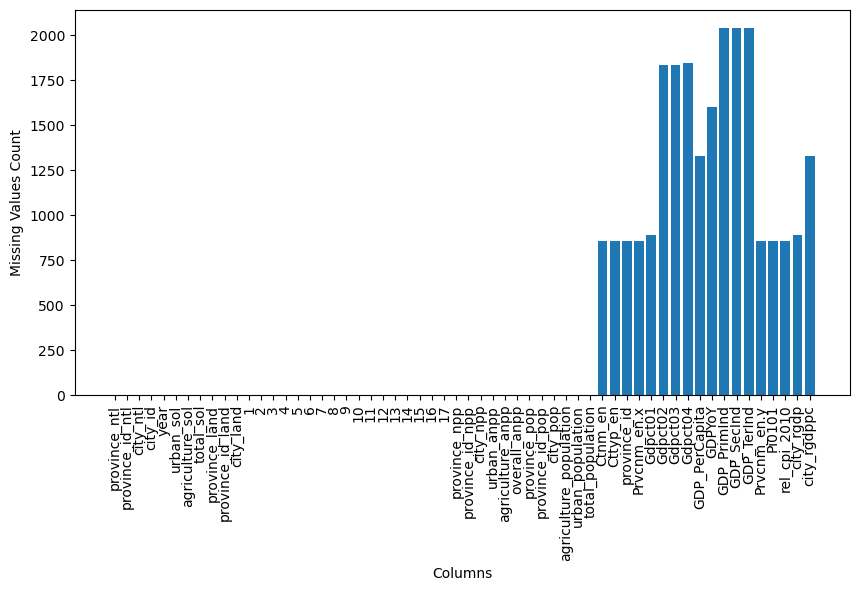

In [21]:
missing_count = city_longpanel.isnull().sum()

plt.figure(figsize=(10, 5))
plt.bar(missing_count.index, missing_count.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=90)
plt.show()


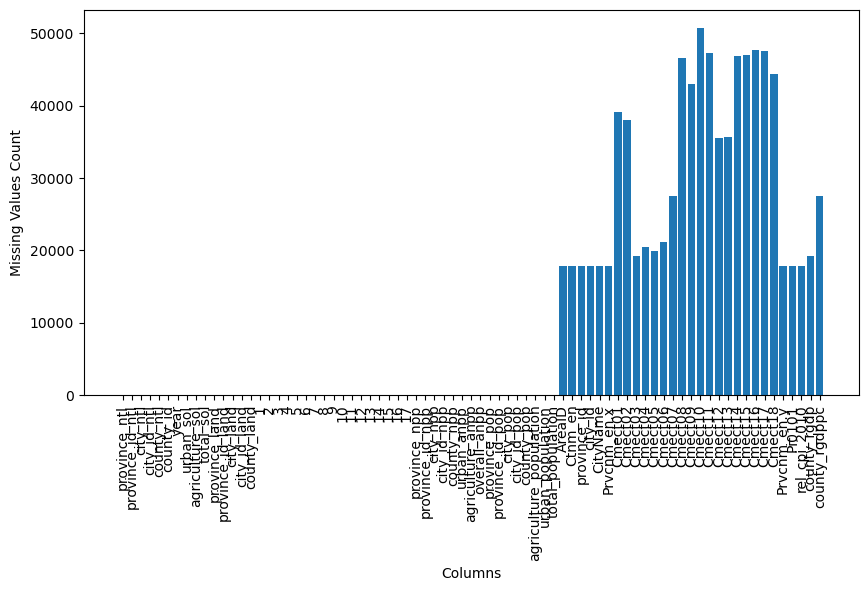

In [22]:
missing_count = county_longpanel.isnull().sum()

plt.figure(figsize=(10, 5))
plt.bar(missing_count.index, missing_count.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=90)
plt.show()

### Histogram

In [23]:
px.histogram(city_gdp, x="city_rgdp", nbins=20, title="Histogram graph of city level real GDP (2001-2020)")

In [24]:
#Take logarithm
city_gdp['city_lggdp'] = np.log(city_gdp['city_rgdp'])
city_gdp['city_lggdppc'] = np.log(city_gdp['city_rgdppc'])
county_gdp['county_lggdp'] = np.log(county_gdp['county_rgdp'])
county_gdp['county_lggdppc'] = np.log(county_gdp['county_rgdppc'])

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In [25]:
city_longpanel['city_lggdp'] = np.log(city_longpanel['city_rgdp'])
city_longpanel['city_lggdppc'] = np.log(city_longpanel['city_rgdppc'])
county_longpanel['county_lggdp'] = np.log(county_longpanel['county_rgdp'])
county_longpanel['county_lggdppc'] = np.log(county_longpanel['county_rgdppc'])
city_longpanel['lg_totalsol'] = np.log(city_longpanel['total_sol'])
county_longpanel['lg_totalsol'] = np.log(county_longpanel['total_sol'])
city_longpanel['lg_ruralsol'] = np.log(city_longpanel['agriculture_sol'])
county_longpanel['lg_ruralsol'] = np.log(county_longpanel['agriculture_sol'])
city_longpanel['lg_urbansol'] = np.log(city_longpanel['urban_sol'])
county_longpanel['lg_urbansol'] = np.log(county_longpanel['urban_sol'])

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In [26]:
city_longpanel['lg_ruralnpp'] = np.log(city_longpanel['agriculture_anpp'])
county_longpanel['lg_ruralnpp'] = np.log(county_longpanel['agriculture_anpp'])

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In [27]:
city_longpanel["lg_nonagri"] = np.log(
    city_longpanel["city_rgdp"]
    * (city_longpanel["Gdpct03"] + city_longpanel["Gdpct04"])
)
city_longpanel["lg_agri"] = np.log(
    city_longpanel["city_rgdp"] * city_longpanel["Gdpct02"]
)
city_longpanel["lg_ind"] = np.log(
    city_longpanel["city_rgdp"] * city_longpanel["Gdpct03"]
)
city_longpanel["lg_ser"] = np.log(
    city_longpanel["city_rgdp"] * city_longpanel["Gdpct04"]
)


In [28]:
county_longpanel["lg_nonagri"] = np.log(
    (county_longpanel["Cmect05"] + county_longpanel["Cmect06"])
    / county_longpanel["rel_cpi_2010"]
    * 100
)
county_longpanel["lg_agri"] = np.log(
    county_longpanel["Cmect04"] / county_longpanel["rel_cpi_2010"] * 100
)
county_longpanel["lg_ind"] = np.log(
    county_longpanel["Cmect05"] / county_longpanel["rel_cpi_2010"] * 100
)
county_longpanel["lg_ser"] = np.log(
    county_longpanel["Cmect06"] / county_longpanel["rel_cpi_2010"] * 100
)


/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in log



In [29]:
px.histogram(city_gdp, x="city_lggdp", nbins=30, title="Histogram graph of city level log real GDP (2001-2020)")

In [30]:
px.histogram(county_gdp, x="county_lggdp", nbins=30, title="Histogram graph of county level log real GDP (2001-2020)")

### Line plots

In [31]:
county_gdp_drop = county_gdp.dropna()
px.line(county_gdp_drop, x='year', y='county_lggdppc', color='Ctnm_en')

In [32]:
city_gdp_drop = city_gdp.dropna()
px.line(city_gdp_drop, x='year', y='city_lggdppc', color='Ctnm_en')

### Scatter plots

In [33]:
city_longpanel.dropna(inplace=True)
px.scatter(city_longpanel, 
            x = 'lg_totalsol',
            y = 'city_lggdp',
            hover_name= 'Ctnm_en',
            trendline= 'ols',
            trendline_scope= 'overall'
                 )

In [34]:
px.scatter(
    city_longpanel,
    x = 'lg_totalsol',
    y = 'city_lggdp',
    hover_name="Ctnm_en",
    trendline="ols",
    marginal_x="box",
    marginal_y="box",
    animation_frame = 'year',
    range_x = [1,15],
    range_y = [1.5,13])

In [35]:
fig = px.scatter(city_longpanel, x='lg_totalsol', y='city_lggdp', trendline='ols', 
                 labels={'lg_totalsol': 'Total sum of lights', 'city_lggdp': 'City log GDP'},
                 title='Regression Scatter Plot of NTL vs. City GDP (log)')
fig.add_scatter(x=city_longpanel['lg_urbansol'], y=city_longpanel['city_lggdp'],mode='markers', name='Urban NTL')
fig.add_scatter(x=city_longpanel['lg_ruralsol'], y=city_longpanel['city_lggdp'], mode='markers', name='Rural NTL')
fig.show()

In [36]:
fig = px.scatter(city_longpanel, x='lg_totalsol', y='city_lggdp', trendline='ols', 
                 labels={'lg_totalsol': 'Total sum of lights', 'city_lggdp': 'City log GDP'},
                 title='Regression Scatter Plot of total NTL vs. City GDP (log)')
fig.add_scatter(x=city_longpanel['lg_totalsol'], y=city_longpanel['lg_nonagri'],mode='markers', name='Non-agriculture GDP')
fig.add_scatter(x=city_longpanel['lg_totalsol'], y=city_longpanel['lg_ind'], mode='markers', name='Industrial GDP')
fig.add_scatter(x=city_longpanel['lg_totalsol'], y=city_longpanel['lg_ser'], mode='markers', name='Service NTL')
fig.show()

In [40]:
px.scatter(city_longpanel, 
            x = 'lg_ruralnpp',
            y = 'lg_agri',
            hover_name= 'Ctnm_en',
            trendline= 'ols',
            trendline_scope= 'overall'
                 )

In [42]:
city_longpanel['lg_overallnpp'] = np.log(city_longpanel['overall_anpp'])
px.scatter(city_longpanel, 
            x = 'lg_overallnpp',
            y = 'lg_agri',
            hover_name= 'Ctnm_en',
            trendline= 'ols',
            trendline_scope= 'overall'
                 )

In [39]:
px.scatter(
    city_longpanel,
    x = 'lg_ruralnpp',
    y = 'lg_agri',
    hover_name="Ctnm_en",
    trendline="ols",
    marginal_x="box",
    marginal_y="box",
    animation_frame = 'year',
    range_x = [1.5,10],
    range_y = [1.5,13.5])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=99321db0-dfa2-48ce-ab9d-1e777e417e2b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>